In [2]:
import csv

In [3]:
import pandas as pd

In [10]:
import numpy as np

In [18]:
import seaborn as sns

In [12]:
myDict = {}

with open("2024-annual-report-report-data-all-states.csv", "r", encoding = "utf-8", errors = "replace") as file:

    csvReader = csv.reader(file, delimiter = ",")
    next(csvReader)

    for row in csvReader:
        factor = row[1]
        state = row[2]
        value = row[3]
        rank = row[5]

        if state == "HI" or state == "IA" or state == "ND" or state == "MI" or state == "WV":
            if state not in myDict:
                myDict[state] = {}
                
            if factor == "Depression":
                myDict[state]["Depression"] = value
                myDict[state]["Depression State Ranking"] = rank
                
            if factor == "Insufficient Sleep":
                myDict[state]["Insufficient Sleep"] = value

            if factor == "Adverse Childhood Experiences":
                myDict[state]["Adverse Childhood Experiences"] = value

            if factor == "Poverty":
                myDict[state]["Poverty"] = value

            if factor == "Food Insecurity":
                myDict[state]["Food Insecurity"] = value

                
 

In [13]:
df = pd.DataFrame(myDict)

# rearranges columns and rows
df = df[["HI", "IA", "ND", "MI", "WV"]]
df = df.loc[["Depression State Ranking", "Depression", "Poverty", "Food Insecurity", "Adverse Childhood Experiences", "Insufficient Sleep"]]

df.to_csv("5states_depression_value&score_&OUTSIDE_VARS.csv")

In [25]:
df

,HI,IA,ND,MI,WV
Depression State Ranking,1,13,25,36,48
Depression,13.9,19.2,22.3,24.1,31.1
Poverty,10.3,11.6,11.1,13.8,17.2
Food Insecurity,9.6,9.8,8.6,13,13.7
Adverse Childhood Experiences,13.2,16.3,17.9,18.2,20
Insufficient Sleep,45.6,32.9,33.2,35.2,41.3


In [40]:
# change dtypes to float
df_float = df.astype(float)
df_float

,HI,IA,ND,MI,WV
Depression State Ranking,1.0,13.0,25.0,36.0,48.0
Depression,13.9,19.2,22.3,24.1,31.1
Poverty,10.3,11.6,11.1,13.8,17.2
Food Insecurity,9.6,9.8,8.6,13.0,13.7
Adverse Childhood Experiences,13.2,16.3,17.9,18.2,20.0
Insufficient Sleep,45.6,32.9,33.2,35.2,41.3


HI    float64
IA    float64
ND    float64
MI    float64
WV    float64
dtype: object

<Axes: >

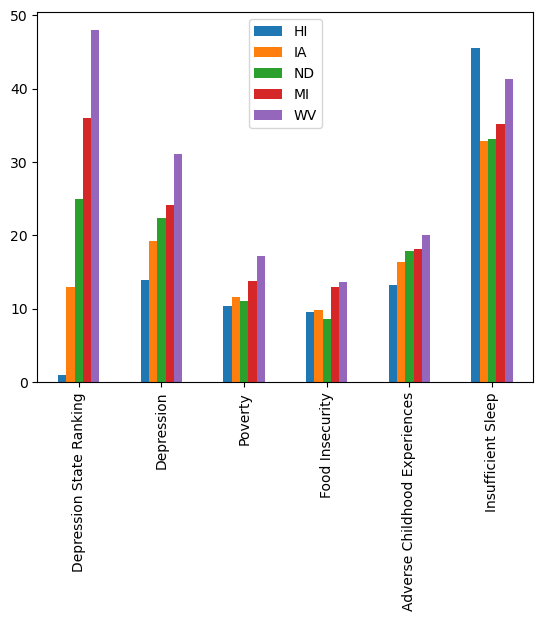

In [46]:
df_float.plot(kind='bar')

In [36]:

#selected_row = df.loc["Depression"]

#selected_row.plot.bar(title='Bar Graph for Row2')

TypeError: no numeric data to plot

In [52]:
df_float_bargraph = df_float[df_float["Depression"]]

KeyError: 'Depression'

In [50]:
# general bar graph comparing states and their values (in ranked order)
# x axis - state
# y axis - values 
#df['state'].plot(kind = "plot")

# new df
#df_float_bargraph = df_flot[df_float["Depression"]]


# states r names of the columns
depression_values = df_float.loc["Depression"] # get only the row w/ the values for depression


sns.barplot(
    x = depression_values.index,
    y = depression_values.values,
    data = df_float
)


#selected_row.plot.bar(title='Bar Graph for Row2')

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 6 and the vector passed to `x` has length 5.

In [ ]:
# data frame that just shows depression scores of each thing 


In [7]:
import pandas as pd

# Load CSV
df2 = pd.read_csv("2024-annual-report-report-data-all-states.csv", encoding="latin1")
df2 = df2.drop(columns=["Report","Source", "LowerCI", "UpperCI"])

# Define states of interest
states_of_interest = ["HI", "IA", "ND", "MI", "WV"]

# Filter for the states
df2 = df2[df2["State"].isin(states_of_interest)]

# Filter for Depression factors (anything starting with "Depression")
depression_df = df2[df2["Measure"].str.startswith("Depression")] # gives us only depression factors for the states we want
depression_df = depression_df.drop(columns = ["Data Year(s)"])
# check unique labels
#print(depression_df["Measure"].unique())

# Pivot the table: rows = factors, columns = states
pivot_table = depression_df.pivot(index="Measure", columns="State", values="Value") # more legible

# Display
print(pivot_table)


State                                         HI    IA    MI    ND    WV
Measure                                                                 
Depression                                  13.9  19.2  24.1  22.3  31.1
Depression - $25,000-$49,999                16.3  22.6  25.4  27.9  35.6
Depression - $50,000-$74,999                11.8  16.5  21.7  19.4  27.3
Depression - $75,000 or More                11.8  14.1  18.5  16.2  22.4
Depression - Age 65+                        10.0  12.3  16.8  13.7  21.5
Depression - Ages 18-44                     16.2  24.0  29.5  28.5  36.5
Depression - Ages 45-64                     14.0  17.9  22.7  18.5  32.8
Depression - American Indian/Alaska Native   NaN   NaN   NaN  28.7   NaN
Depression - Asian                           9.7   NaN   8.9   NaN   NaN
Depression - Black                          18.4  11.7  19.7   NaN  22.4
Depression - College Grad                   12.9  17.3  19.5  16.1  22.3
Depression - Difficulty Hearing             19.0  2

/var/folders/89/1xx8slwx0sz7bb2jd1vmzghh0000gn/T/ipykernel_33713/767364927.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("2024-annual-report-report-data-all-states.csv", encoding="latin1")


In [9]:
depression_df.to_csv("Df_5states_DepressionALL_FACTORS.csv")

In [88]:
df2.head()

,Measure,State,Value,Score,Rank,Data Year(s)
12,Social and Economic Factors,HI,0.438,0.438,14.0,2024
13,Social and Economic Factors,IA,0.464,0.464,12.0,2024
23,Social and Economic Factors,MI,-0.225,-0.225,36.0,2024
29,Social and Economic Factors,ND,0.444,0.444,13.0,2024
50,Social and Economic Factors,WV,-0.795,-0.795,46.0,2024


In [87]:
# now that we have data for ALLL of the depression factors, we are gonna make a dataframe for  only the factors we want

# age 
depression_by_age = ["Depression - Age 65+", "Depression - Ages 18-44", "Depression - Ages 45-64"]
depression_age_df = depression_df[ depression_df["Measure"].isin(depression_by_age)]
depression_age_df.pivot(index="Measure",columns="State",values="Value")

State,HI,IA,MI,ND,WV
Measure,,,,,
Depression - Age 65+,10.0,12.3,16.8,13.7,21.5
Depression - Ages 18-44,16.2,24.0,29.5,28.5,36.5
Depression - Ages 45-64,14.0,17.9,22.7,18.5,32.8


In [92]:
# income level
depression_by_income = ["Depression - Less Than $25,000", "Depression - $25,000-$49,999", "Depression - $50,000-$74,999", "Depression - $75,000 or More"]
depression_by_income = depression_df[ depression_df["Measure"].isin(depression_by_income)]
depression_by_income.pivot(index="Measure",columns="State",values="Value")

State,HI,IA,MI,ND,WV
Measure,,,,,
"Depression - $25,000-$49,999",16.3,22.6,25.4,27.9,35.6
"Depression - $50,000-$74,999",11.8,16.5,21.7,19.4,27.3
"Depression - $75,000 or More",11.8,14.1,18.5,16.2,22.4
"Depression - Less Than $25,000",25.7,31.3,36.5,39.9,42.9


In [89]:
# gender 
depression_by_gender = ["Depression - Female", "Depression - Male"]
depression_by_gender = depression_df[ depression_df["Measure"].isin(depression_by_gender)]
depression_by_gender.pivot(index="Measure",columns="State",values="Value")

State,HI,IA,MI,ND,WV
Measure,,,,,
Depression - Female,17.4,25.8,31.2,30.5,39.1
Depression - Male,10.3,12.4,16.7,14.5,22.9


In [ ]:
# sexuality

In [ ]:
# by health condition

In [55]:

# find what the csv file we are using is encoded in (utf-8 was giving an error)

import chardet
def detect_encode(file):
    with open(file, "rb") as f:
        result = chardet.detect(f.read(10000))
    return result['encoding']
myf = "2024-annual-report-report-data-all-states.csv"
encoding = detect_encode(myf)
print(encoding)

ascii
